# Simple NLP and word clouds using wordcloud and NLTK libraries

Natural language processing (NLP) is a broad set of approaches used to deal with text data and study things like syntax, word usage, sentence and phrase structure, ontologies, word frequency and letter frequency, at the basic level. It also involves advanced and high level analysis such as semantics and sentiment analysis, text specific visualizations, translation, cryptography and encoding/decoding.

## Relevant courses and links
* https://www.coursera.org/course/nlp 
* https://www.quora.com/What-are-some-good-books-on-natural-language-processing-and-semantic-analysis 
* http://www.nltk.org/book/ (Free and relevant book focused on NLP in Python)


Natural language processing is an activity for which Python is eminently qualified, for several reasons:

* High level string manipulation functionality
* High level list comprehensions and "syntactic sugar"
* Regular expression parsing library built in
* Natural Language Tool Kit (NLTK) has a lot of advanced ML specific to text processing
* Scikit learn has a few text based feature extraction algorithms
* Scikit learn has Naive Bayes, Decision Tree and other classifiers, which are useful for text classification
* Wordcloud is a library with high level wordcloud plotting functionality


In this example, we'll take Rudyard Kipling's famous book "Jungle Book", and study some parts of it from an NLP standpoint and analyze various things in it.


In [2]:
import pandas as pd
import numpy as np
import nltk, re

We've imported key libraries here including NLTK, and the Python regular expression parsing library, "re".

## Reading and preparing the text data (Rudyard Kipling's The Jungle Book)

The Jungle Book is a public domain book on Gutenberg.org: http://www.gutenberg.org/ebooks/35997 

We can pull this data into our local machine using the URL Library in Python, "urllib".

In [118]:
import urllib
book_raw = urllib.urlretrieve("http://www.gutenberg.org/ebooks/35997.txt.utf-8", "/home/rajesh/hobby_nltk/jb_kipling.txt")

In [119]:
f = open('/home/rajesh/hobby_nltk/jb_kipling.txt', 'r')
book = f.readlines()
book = " ".join(book)

## Preparing functions to stem and tokenize the dataset

* **Stemming** : The process of taking various versions of a word and truncating it to its root word. Since there are many thousands of root words in English, some typical approaches (such as suffix removal) are used to separate out word roots (or "stem words") from the words (or "branch words"). More here: http://www.nltk.org/api/nltk.stem.html 

* **Tokenization** : Tokenization is the process of converting a corpus of sentences to features (words). More here: http://www.nltk.org/api/nltk.tokenize.html 

In [120]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer('english')
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

stemmer.stem

def tokenize(text):
    # remove non letters
    text = re.sub("[^a-zA-Z]", " ", text)
    # tokenize
    tokens = nltk.word_tokenize(text)
    # stem
    stems = tokens # stem_tokens(tokens, stemmer)
    return stems


## Vectorization

Vectorization is the process of converting tokenized corpuses into a set of features which machine learning algorithms in Scikit learn will understand. Count Vectorizers essentially convert a bag of words into a set of word density features. Within scikit learn these word density features are called token counts. 

Vectorization is a pre-requisite to doing any kind of sentiment analysis. More here: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html 

In [121]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenize,
    lowercase = True,
    stop_words = 'english',
    max_features = 1000
)

## Tokenizing the book

In [122]:
tokenized_book = tokenize(book)

## Vectorizing the tokenized bag of words

Vectorizing the tokenized bag of words allows us to explore word frequency. We run the "fit_transform()" method on the vectorizer, and pass the bag of words to it.

In [123]:
corpus_data_features = vectorizer.fit_transform(tokenized_book)
corpus_data_features_nd = corpus_data_features.toarray()


In [124]:
vocabulary = vectorizer.get_feature_names()

In [125]:
vocabulary

[u'able',
 u'accepted',
 u'access',
 u'account',
 u'afraid',
 u'afternoon',
 u'afterward',
 u'ago',
 u'agree',
 u'agreement',
 u'ah',
 u'air',
 u'akela',
 u'aloud',
 u'amir',
 u'angrily',
 u'angry',
 u'animals',
 u'answer',
 u'answered',
 u'anxious',
 u'anybody',
 u'appa',
 u'archive',
 u'arms',
 u'art',
 u'ask',
 u'asked',
 u'asleep',
 u'associated',
 u'ate',
 u'awake',
 u'away',
 u'babies',
 u'baby',
 u'backs',
 u'bad',
 u'badly',
 u'bagheera',
 u'baloo',
 u'bandar',
 u'banged',
 u'bark',
 u'bat',
 u'bath',
 u'battery',
 u'beach',
 u'beaches',
 u'bear',
 u'beast',
 u'beasts',
 u'beat',
 u'beaten',
 u'beating',
 u'beautiful',
 u'bed',
 u'began',
 u'begin',
 u'beginning',
 u'believe',
 u'belonged',
 u'best',
 u'better',
 u'big',
 u'billy',
 u'bird',
 u'birds',
 u'bit',
 u'bite',
 u'bitten',
 u'black',
 u'blood',
 u'blow',
 u'blowing',
 u'blue',
 u'body',
 u'bones',
 u'book',
 u'born',
 u'bought',
 u'bound',
 u'bowing',
 u'boy',
 u'boys',
 u'branch',
 u'branches',
 u'break',
 u'breakfas

## Top N Words

In [126]:
# Sum up the counts of each vocabulary word
def top_n(corp):
    vocab = vectorizer.get_feature_names()
    dist = np.sum(corp, axis=0)
    freq_words = pd.DataFrame({"word": vocab, "freq": dist})
    freq_words = freq_words.set_index('freq')
    freq_words = freq_words.sort_index(ascending=False)
    print freq_words.iloc[0:10]

In [127]:
top_n(corpus_data_features_nd)

          word
freq          
442       said
404          s
241     little
228     mowgli
180        man
150     jungle
139       head
131   bagheera
119      rikki
116        nag


The benefit of doing a top-n analysis is to identify any obvious "filler" words which can be avoided in further analysis. In this case, we have 430 occurrences of the word "said". Since Jungle Book is a novel with a narrative dialogue, it is likely to be the case that this word is overused. We can remove such words from the corpus as below.

## Trimming the corpus

Trimming the corpus is done to develop a smaller corpus without filler words, random words and phrases, and in the real world (non-book corpuses), things like hyperlinks or special characters.

In [128]:
remove_list = ['said', 's', 'as', ' the ', ' a ']
def remove_word_from_string(string, words = remove_list):
    for word in words:
        string = string.replace(word, " ")
    return string

In [129]:
trimmed_tokenized_book = [i for i in map(remove_word_from_string, tokenized_book)]

In [130]:
trimmed_corpus_data_features = vectorizer.fit_transform(trimmed_tokenized_book)
trimmed_corpus_data_features_nd = trimmed_corpus_data_features.toarray()


In [131]:
trimmed_vocabulary = vectorizer.get_feature_names()
trimmed_vocabulary

[u'able',
 u'acce',
 u'accepted',
 u'account',
 u'acro',
 u'afe',
 u'afraid',
 u'afternoon',
 u'afterward',
 u'age',
 u'ago',
 u'agree',
 u'agreement',
 u'ah',
 u'air',
 u'ake',
 u'akela',
 u'al',
 u'alive',
 u'almo',
 u'aloud',
 u'alway',
 u'ame',
 u'amir',
 u'ang',
 u'angrily',
 u'angry',
 u'animal',
 u'ant',
 u'anxiou',
 u'anybody',
 u'ape',
 u'appa',
 u'archive',
 u'arm',
 u'art',
 u'ate',
 u'avage',
 u'aw',
 u'awake',
 u'away',
 u'ay',
 u'aying',
 u'ba',
 u'babie',
 u'baby',
 u'bad',
 u'badly',
 u'bagheera',
 u'baloo',
 u'bamboo',
 u'band',
 u'bandar',
 u'banged',
 u'bare',
 u'bark',
 u'bat',
 u'bath',
 u'battery',
 u'bea',
 u'beach',
 u'beache',
 u'bear',
 u'beat',
 u'beating',
 u'beautiful',
 u'becau',
 u'bed',
 u'began',
 u'begin',
 u'beginning',
 u'believe',
 u'better',
 u'big',
 u'billy',
 u'bird',
 u'bit',
 u'bite',
 u'bitten',
 u'black',
 u'blood',
 u'blow',
 u'blowing',
 u'blue',
 u'body',
 u'bone',
 u'book',
 u'born',
 u'bought',
 u'bound',
 u'boy',
 u'branch',
 u'branche

In [132]:
top_n(trimmed_corpus_data_features_nd)

        word
freq        
776        t
665       hi
547        e
545       wa
241   little
229   mowgli
180      man
164      thi
161        o
157   jungle


# Visualizing text frequency with wordclouds

In [133]:
def gen_wordcloud(text, title):
    import wordcloud #library with high level functionality for creating wordclouds
    import matplotlib.pyplot as plt
    %matplotlib inline
    wcld = wordcloud.WordCloud().generate_from_text(text)
    plt.figure(figsize=(12,12))
    plt.title(title)
    plt.imshow(wcld) #matplotlib function to plot a set of points and colours
    plt.show()

## Wordcloud for original corpus

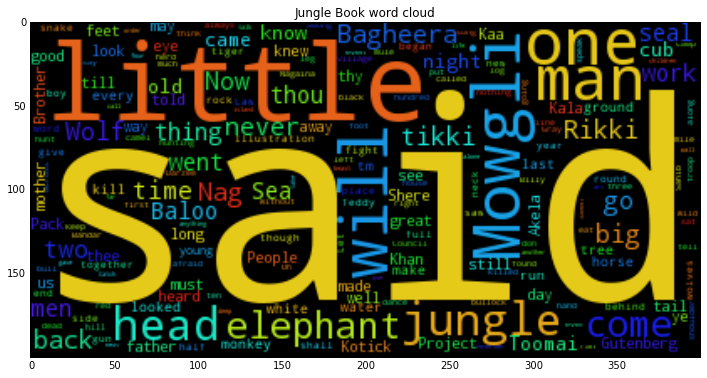

In [134]:
#This step allows us to choose a certain number of characters in the book
tokenized_book_array = " ".join(tokenized_book[0:10**6]) 
gen_wordcloud(tokenized_book_array, "Jungle Book word cloud")

## Wordcloud for trimmed corpus

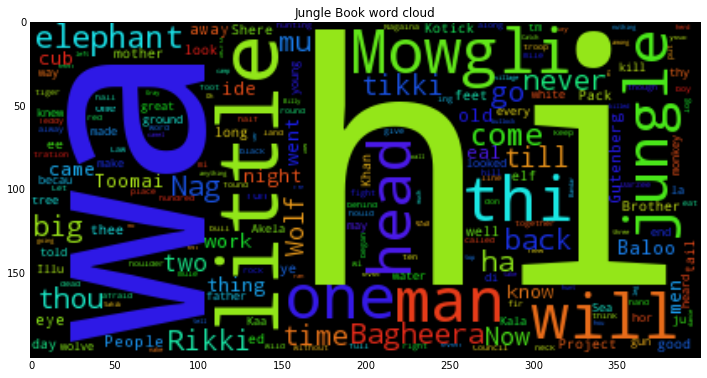

In [135]:
trimmed_tokenized_book_array = " ".join(trimmed_tokenized_book)
gen_wordcloud(trimmed_tokenized_book_array, "Jungle Book word cloud")

## Notes on advanced NLP techniques

* Information extraction is one key element of NLP approaches: http://www.nltk.org/book/ch07.html 
* Chunk structures - methods of chunking groups of letters into words, which have types, is also done in IE.
    * Classifier based chunkers 
    * Semantic graphs
* Feature based grammars: http://www.nltk.org/book/ch09.html 
    * Syntactic agreement and difference analysis
* Sentence meaning analysis: http://www.nltk.org/book/ch10.html
    * Natural language understanding
    * Propositional logic, first order logic
    * Relational maps
    * Semantics of English sentences